# Assignment 1
In this assignment, we will be performing Stochastic Gradient Descent and OLS regression to develop a model that best fits the Auto MPG dataset.


### 1. Data Pre-processing

In [ ]:
#installing dependencies
!pip install numpy; pandas; seaborn
!pip install ucimlrepo

/bin/bash: line 1: pandas: command not found
/bin/bash: line 1: seaborn: command not found


In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)
df = pd.concat([pd.DataFrame(data=auto_mpg.data.features),
                pd.DataFrame(data=auto_mpg.data.targets)], axis=1)

df.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,8,130.0,3504,12.0,70,1,18.0
1,350.0,8,165.0,3693,11.5,70,1,15.0
2,318.0,8,150.0,3436,11.0,70,1,18.0
3,304.0,8,150.0,3433,12.0,70,1,16.0
4,302.0,8,140.0,3449,10.5,70,1,17.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   mpg           398 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [ ]:
df.isna().sum()
df = df.dropna()

In [ ]:
df.shape
df.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,8,130.0,3504,12.0,70,1,18.0
1,350.0,8,165.0,3693,11.5,70,1,15.0
2,318.0,8,150.0,3436,11.0,70,1,18.0
3,304.0,8,150.0,3433,12.0,70,1,16.0
4,302.0,8,140.0,3449,10.5,70,1,17.0


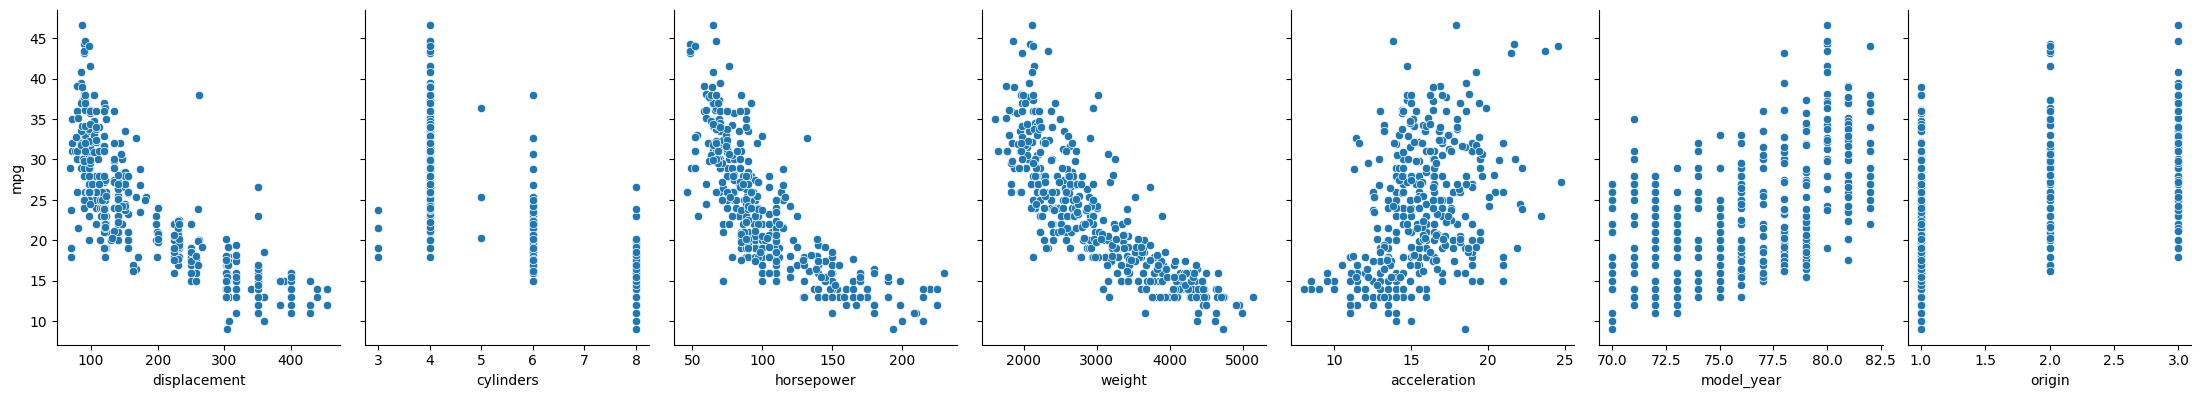

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#pairplot for every feature against target variable(MPG)
sns.pairplot(df, x_vars=['displacement', 'cylinders', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin'],
             y_vars='mpg', height=4, aspect=0.8, kind='scatter')


plt.show()

In [ ]:
df['mpg'].info()
y = df['mpg']
y.head()

<class 'pandas.core.series.Series'>
Index: 392 entries, 0 to 397
Series name: mpg
Non-Null Count  Dtype  
--------------  -----  
392 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [ ]:
# getting rid of categorical variables so we only have to deal with integers
# make binary columns into numbers
# standardize everything
# find correlation matrix
# drop unused columns

In [ ]:
df.dtypes

,0
displacement,float64
cylinders,int64
horsepower,float64
weight,int64
acceleration,float64
model_year,int64
origin,int64
mpg,float64


In [ ]:
df.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,8,130.0,3504,12.0,70,1,18.0
1,350.0,8,165.0,3693,11.5,70,1,15.0
2,318.0,8,150.0,3436,11.0,70,1,18.0
3,304.0,8,150.0,3433,12.0,70,1,16.0
4,302.0,8,140.0,3449,10.5,70,1,17.0


<Axes: >

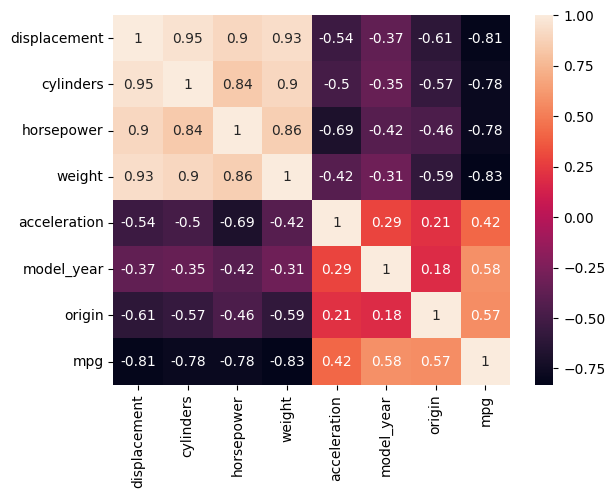

In [ ]:
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

### 2. Standardize Data and SGD

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score


X = df.drop(columns=['mpg', 'acceleration'])
y = df['mpg']

#Data Split and data normalization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_sets = [
    {'max_iter': 1000, 'tol': 1e-3, 'alpha': 0.001, 'learning_rate': 'constant', 'random_state': 42},
    {'max_iter': 1000, 'tol': 1e-3, 'alpha': 0.5, 'learning_rate': 'constant', 'random_state': 42},
    {'max_iter': 1000, 'tol': 1e-3, 'alpha': 0.001, 'learning_rate': 'optimal', 'random_state': 42},
    {'max_iter': 1000, 'tol': 1e-3, 'alpha': 0.5, 'learning_rate': 'optimal', 'random_state': 42},
    {'max_iter': 1000, 'tol': 1e-3, 'alpha': 0.5, 'learning_rate': 'invscaling', 'random_state': 42},
    {'max_iter': 1000, 'tol': 1e-3, 'alpha': 0.01, 'learning_rate': 'invscaling', 'random_state': 42},
    {'max_iter': 1000, 'tol': 1e-3, 'alpha': 0.1, 'learning_rate': 'invscaling', 'random_state': 42},
    {'max_iter': 1000, 'tol': 1e-3, 'alpha': 0.001, 'learning_rate': 'invscaling', 'random_state': 42}
]

tolerance = 0.2
# Use parameters in param_sets to loop through and generate metrics of performance for each model
for params in param_sets:

    sgd = SGDRegressor(
        max_iter=params['max_iter'],
        tol=params['tol'],
        alpha=params['alpha'],
        learning_rate=params['learning_rate'],
        random_state=params['random_state']
    )

    sgd.fit(X_train, y_train)

    # Predict and calculate R^2 score, MSE, MAE, EV, Accuracy within tolerance
    r2 = sgd.score(X_test, y_test)
    y_pred = sgd.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    ev = explained_variance_score(y_test, y_pred)
    within_tolerance = np.mean(np.abs((y_test - y_pred) / y_test) <= tolerance) * 100

    # Print the results
    print(f"Parameters: {params}")
    print(f"R^2 Score: {r2:.4f}\n")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Explained Variance (EV): {ev:.4f}\n")
    print(f"Percentage of Predictions within {tolerance*100}% of Actual Values: {within_tolerance:.2f}%\n")

Parameters: {'max_iter': 1000, 'tol': 0.001, 'alpha': 0.001, 'learning_rate': 'constant', 'random_state': 42}
R^2 Score: 0.7979

Mean Squared Error (MSE): 15.0211
Mean Absolute Error (MAE): 2.9147
Explained Variance (EV): 0.8137

Percentage of Predictions within 20.0% of Actual Values: 88.61%

Parameters: {'max_iter': 1000, 'tol': 0.001, 'alpha': 0.5, 'learning_rate': 'constant', 'random_state': 42}
R^2 Score: 0.7472

Mean Squared Error (MSE): 18.7928
Mean Absolute Error (MAE): 3.1617
Explained Variance (EV): 0.7733

Percentage of Predictions within 20.0% of Actual Values: 84.81%

Parameters: {'max_iter': 1000, 'tol': 0.001, 'alpha': 0.001, 'learning_rate': 'optimal', 'random_state': 42}
R^2 Score: 0.7658

Mean Squared Error (MSE): 17.4116
Mean Absolute Error (MAE): 3.2037
Explained Variance (EV): 0.7826

Percentage of Predictions within 20.0% of Actual Values: 79.75%

Parameters: {'max_iter': 1000, 'tol': 0.001, 'alpha': 0.5, 'learning_rate': 'optimal', 'random_state': 42}
R^2 Score: 

In [ ]:
X.head()

,displacement,cylinders,horsepower,weight,model_year,origin
0,307.0,8,130.0,3504,70,1
1,350.0,8,165.0,3693,70,1
2,318.0,8,150.0,3436,70,1
3,304.0,8,150.0,3433,70,1
4,302.0,8,140.0,3449,70,1


In [ ]:
X_train.shape, X_test.shape

((313, 6), (79, 6))

In [ ]:
sgd.coef_

array([ 1.26835775, -0.61469518, -0.78688284, -4.6501488 ,  2.53365238,
        1.16366149])

In [ ]:
sgd.intercept_

array([22.88351291])

In [ ]:
sgd.score(X_test, y_test)

0.7789340392053274

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
y_pred = sgd.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
ev = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
mse, mae, ev, r2

(16.433918133150815,
 2.9715713133148722,
 0.8041155742311481,
 0.7789340392053274)

### 3. OLS Using StatsModels Library

In [ ]:
import statsmodels.api as sm

In [ ]:
df = df.dropna()
X = df.drop(['mpg'], axis=1)
y = df['mpg']

In [ ]:
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [ ]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [ ]:
X = sm.add_constant(X)
X.head()

,const,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,1.0,307.0,8,130.0,3504,12.0,70,1
1,1.0,350.0,8,165.0,3693,11.5,70,1
2,1.0,318.0,8,150.0,3436,11.0,70,1
3,1.0,304.0,8,150.0,3433,12.0,70,1
4,1.0,302.0,8,140.0,3449,10.5,70,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [ ]:
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]

mod = sm.OLS(y_train, X_train)

In [ ]:
res = mod.fit()

In [ ]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     210.5
Date:                Mon, 09 Sep 2024   Prob (F-statistic):          9.55e-113
Time:                        02:57:41   Log-Likelihood:                -797.49
No. Observations:                 313   AIC:                             1611.
Df Residuals:                     305   BIC:                             1641.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -15.3437      4.882     -3.143   

In [ ]:
y_test_predict = res.predict(X_test)

In [ ]:
sm.tools.eval_measures.rmse(y_test, y_test_predict)

4.124677157156902